# Homework 6, problem 12.3: d

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# set image parameters
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80

plt.rcParams['font.size'] = 25
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

def get_rand_mat(m):
    A = np.zeros((m,m))
    for kk in range(m):
        for jj in range(kk,m):
            A[kk,jj]=1
    B = np.random.multivariate_normal(np.zeros(m),m**-1*np.identity(m),m)
    
    return(A*B)

## (a)
What do the eigenvalues of a random matrix look like? What happens, say, if you take 100 random matrices and superimpose all of their eigenvalues in a single plot? If you do this for $m=8,16,32,64,\dots$ what pattern is suggested?

How does the spectral radius $\rho(A)$ (Exercise 3.2) behave as $m\rightarrow \infty$

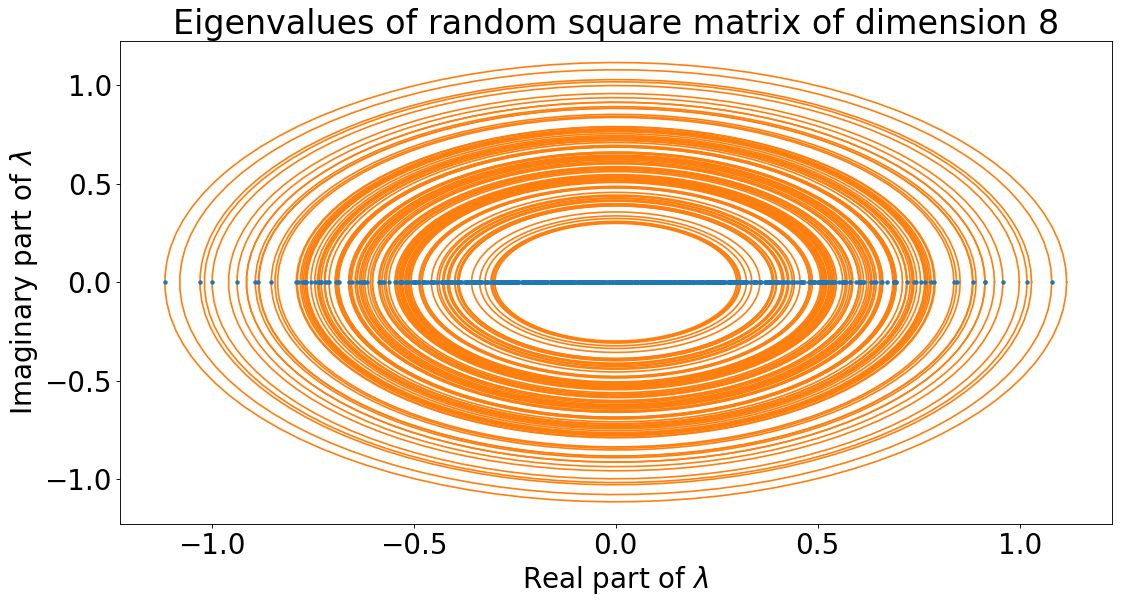

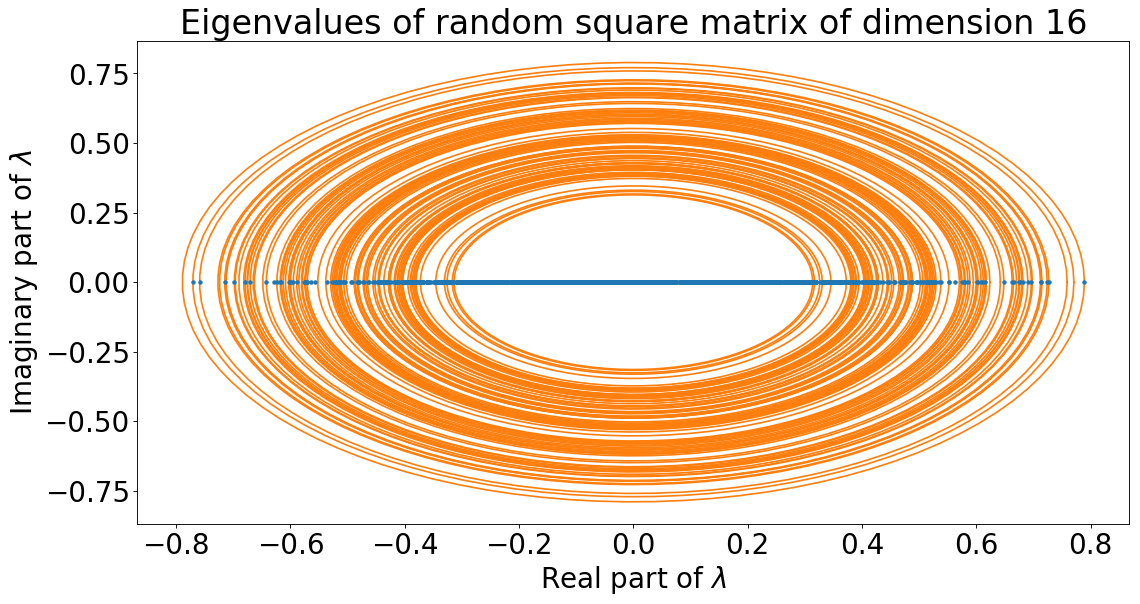

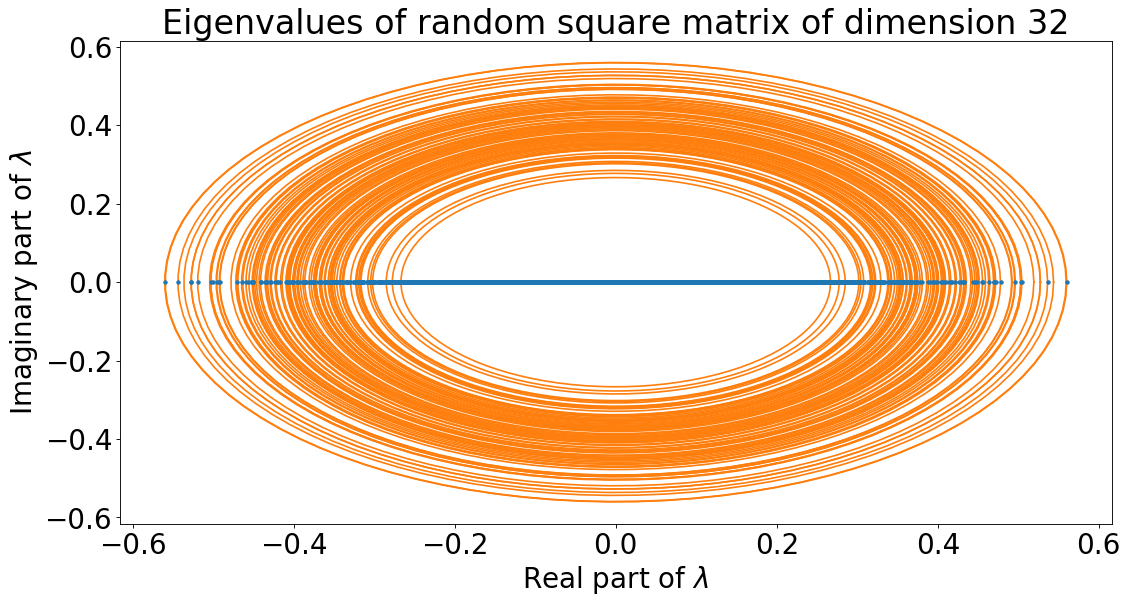

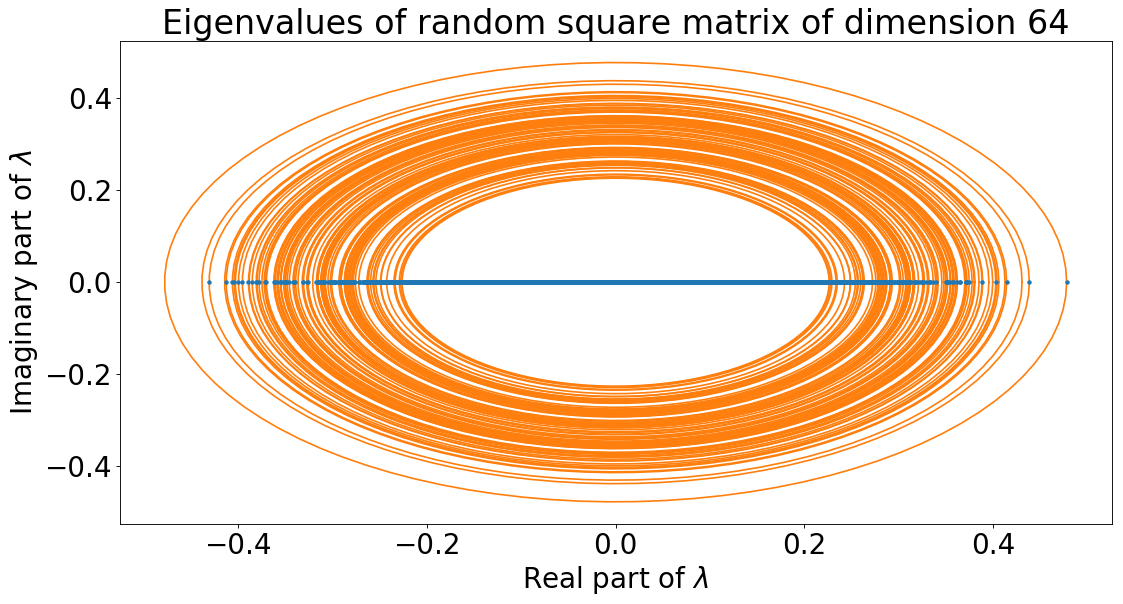

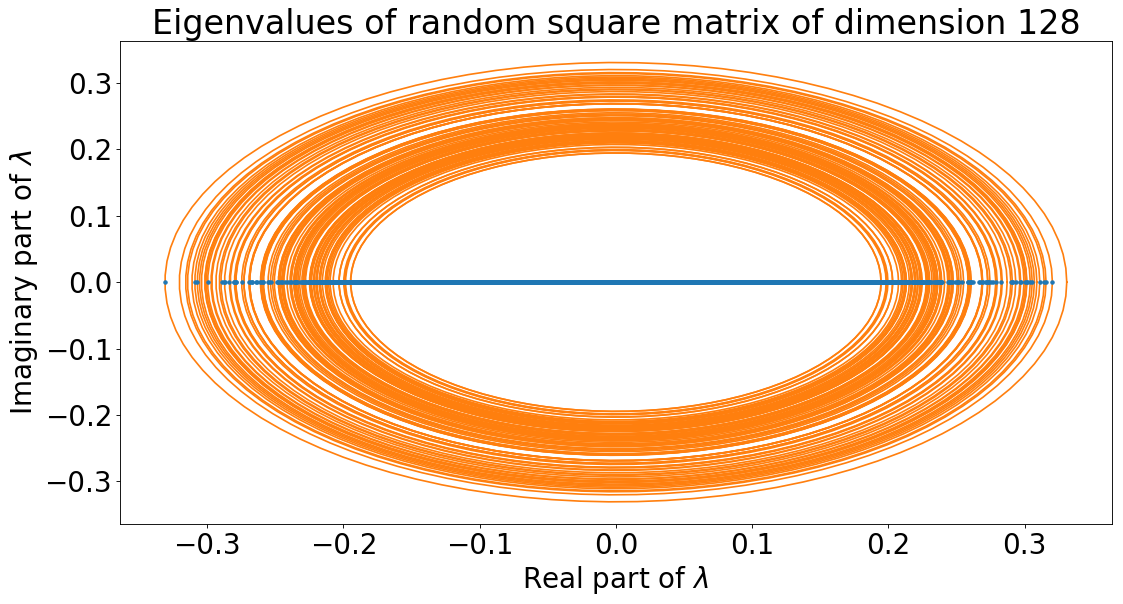

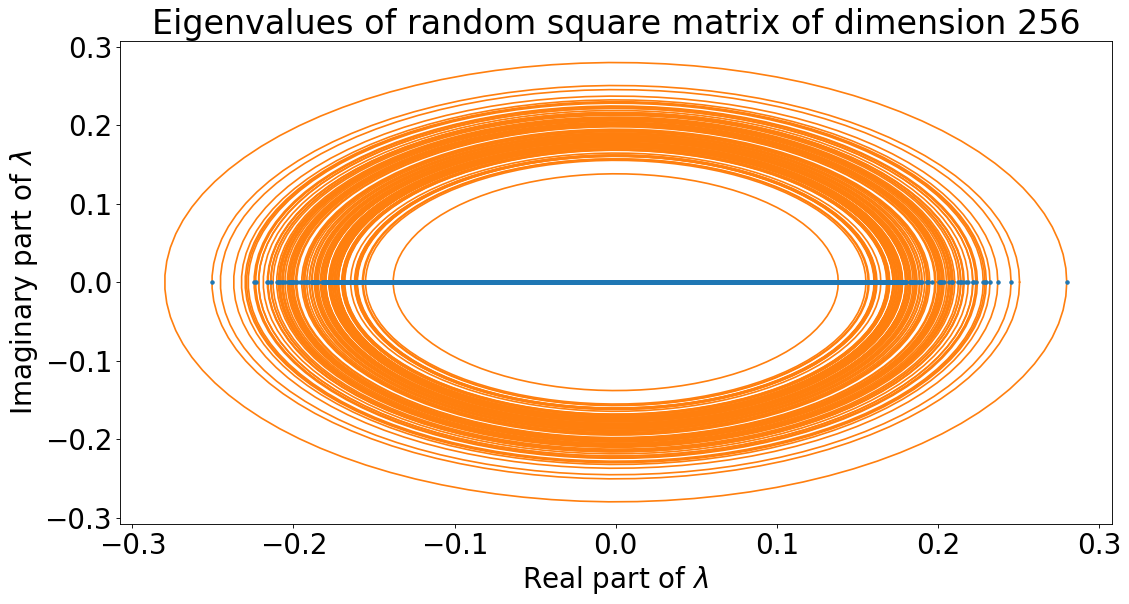

In [2]:
M = [2**kk for kk in range(3,9)]
nIter = 100
xx = np.cos(np.linspace(0,2*np.pi,100))
yy = np.sin(np.linspace(0,2*np.pi,100))

for m in M:
    A = np.array([get_rand_mat(m) for kk in range(nIter)])
    Eig = np.array([np.linalg.eig(A[kk,:,:])[0] for kk in range(nIter)])
    Spec_rad = np.ravel([np.max(np.abs(Eig[kk,:])) for kk in range(nIter)])
    Eig = np.ravel(Eig)
    for kk in range(nIter):
        plt.plot(Spec_rad[kk]*xx,Spec_rad[kk]*yy,'C1')
    plt.plot(Spec_rad[kk]*xx,Spec_rad[kk]*yy,'C1',label='Spectral radius')
#    plt.scatter(np.real(Eig),np.imag(Eig),label='Eigenvalues')
    plt.plot(np.real(Eig),np.imag(Eig),'.',label='Eigenvalues')
    plt.title('Eigenvalues of random square matrix of dimension %s'%(m))
    plt.xlabel('Real part of $\lambda$')
    plt.ylabel('Imaginary part of $\lambda$')
    plt.show()

## (b)
What about norms? How does the 2-norm of a random matrix behanve as $m\rightarrow \infty$? Of course, we must have that $\rho(A)\le ||A||$ (Exercise 3.2). Does this inequality appear to approach equality as $m\rightarrow \infty$?

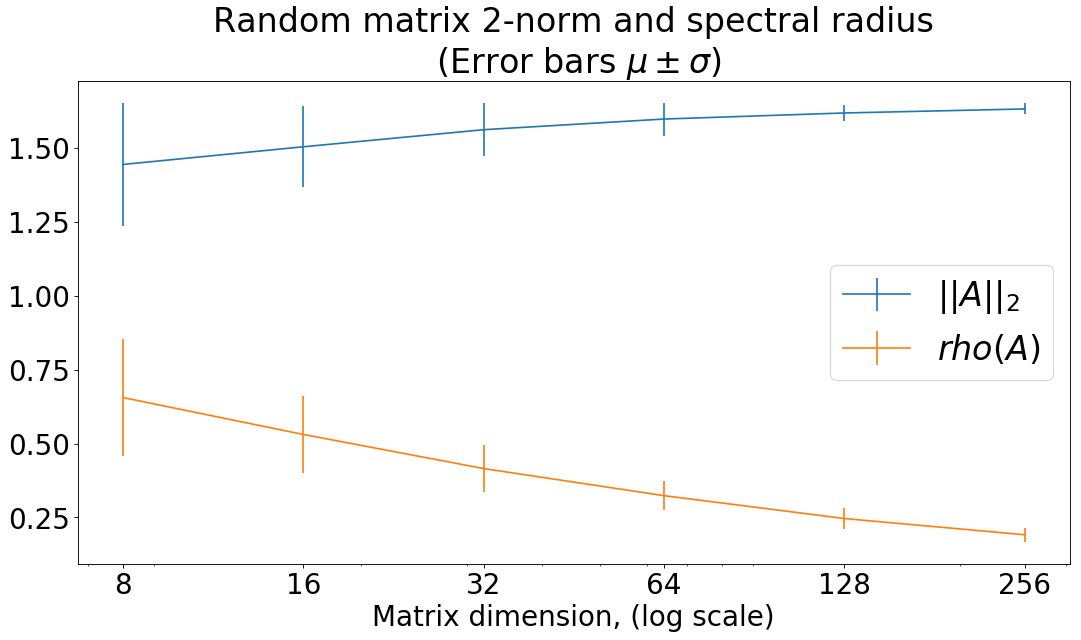

In [3]:
Mean_spec_rad = []
Std_spec_rad = []
Mean_2_norm = []
Std_2_norm = []

for m in M:
    A = np.array([get_rand_mat(m) for kk in range(nIter)])
    Spec_rad = np.ravel([np.max(np.abs(np.linalg.eig(A[kk,:,:])[0])) for kk in range(nIter)])
    Mean_spec_rad.append(np.mean(Spec_rad))
    Std_spec_rad.append(np.std(Spec_rad))
    
    Norm = np.ravel([np.linalg.norm(A[kk,:,:],2) for kk in range(nIter)])
    Mean_2_norm.append(np.mean(Norm))
    Std_2_norm.append(np.std(Norm))
    
plt.errorbar(M,Mean_2_norm,Std_2_norm,label = '$||A||_2$')
plt.errorbar(M,Mean_spec_rad,Std_spec_rad,label = '$rho(A)$')
plt.legend()
plt.xscale('log')
plt.xticks(M,M)
plt.xlabel('Matrix dimension, (log scale)')
plt.title('Random matrix 2-norm and spectral radius\n (Error bars $\mu \pm \sigma$)')
plt.show()

## (c)
What about condition numbers- or more simply, the smallest singular value $\sigma_\min$? Even for a fixed $m$ this question is interesting. What proportions of random matrices in $\mathbb{R}^{m\times m }$ seem to have $\sigma_\min \le 2^{-1},4^{-1},8^{-1},\dots$? In other words, what does that tails of the probability distribution of smallest singular values look like? How does the scale of all of this change with $m$?

In [4]:
Cum_sigma = []
Cum_condit = []

bins = [2**-kk for kk in range(36)][::-1]
cond_bins = [2**kk for kk in range(36)]
xticks = [2**-(3*kk) for kk in range(12)][::-1]
xlabs = ['$2^{-%s}$'%(3*kk) for kk in range(12)][::-1]
for m in M:
    A = np.array([get_rand_mat(m) for kk in range(nIter)])
    sigma_min = np.ravel([np.linalg.svd(A[kk,:,:])[1][-1] for kk in range(nIter)])
    condit = np.ravel([np.linalg.cond(A[kk,:,:]) for kk in range(nIter)])
    
    # Plot distribution of \sigma_\min
#    plt.hist(sigma_min,bins)
#    plt.xscale('log')
#    plt.xticks(xticks,xlabs)
#    plt.xlabel('$\sigma_\min$, (log scale)')
#    plt.ylabel('Frequency')
#    plt.title('Distribution of $\sigma_\min$ of matrix random matrix $A \in\mathbb{R}^{%s^2}$'%(m))
#    plt.show()
    
    Cum_sigma.append([0.01*np.sum(sigma_min < bin_val) for bin_val in bins ])
    Cum_condit.append([0.01*np.sum(condit < bin_val) for bin_val in cond_bins ])
# Plot cummulative probability p(\sigma_\min \le 2^k)


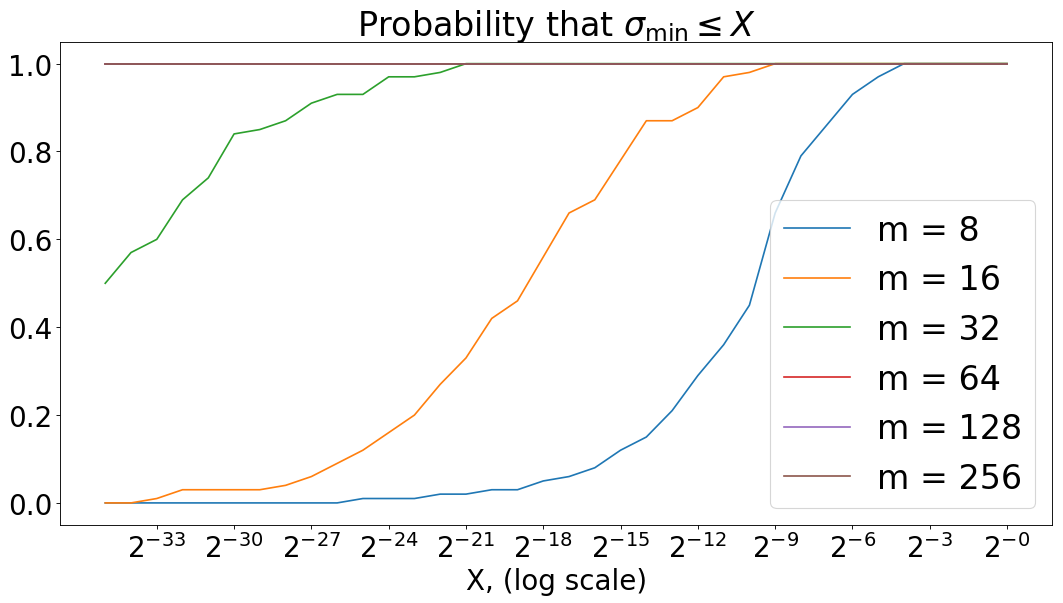

In [5]:
for kk,m in enumerate(M):
    plt.plot(bins,Cum_sigma[kk],label='m = %s'%m)
plt.xscale('log')
plt.xticks(xticks,xlabs)
plt.xlabel('X, (log scale)')
plt.title('Probability that $\sigma_\min \leq X$')
plt.legend()
plt.show()

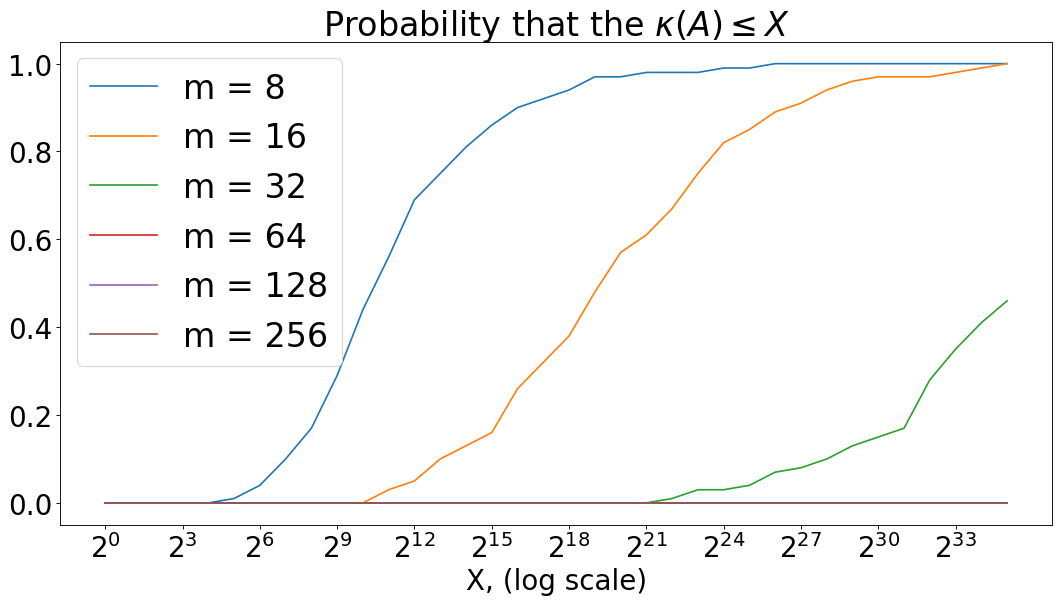

In [6]:
xticks = [2**(3*kk) for kk in range(12)]
xlabs = ['$2^{%s}$'%(3*kk) for kk in range(12)]
for kk,m in enumerate(M):
    plt.plot(cond_bins,Cum_condit[kk],label='m = %s'%m)
plt.xscale('log')
plt.xticks(xticks,xlabs)
plt.xlabel('X, (log scale)')
plt.title('Probability that the $\kappa(A)\leq X$')
plt.legend()
plt.show()